In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
%matplotlib inline 
tqdm.pandas()
color = sns.color_palette()

%matplotlib inline

from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import psutil

/home/sandhya/Project/final/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [2]:
#!pip install plotly

In [96]:
%run ../paths.py
CONST = CONST()

<Figure size 432x288 with 0 Axes>

In [97]:
train = pd.read_csv(CONST.CLEANED_TRAIN)

test = pd.read_csv(CONST.CLEANED_TEST)

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42080 entries, 0 to 42079
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             42080 non-null  int64  
 1   tweet                  42080 non-null  object 
 2   class                  42080 non-null  int64  
 3   hashtags               42080 non-null  int64  
 4   user                   42080 non-null  int64  
 5   allcaps                42080 non-null  int64  
 6   stop_word_count        42080 non-null  int64  
 7   num_exclamation_marks  42080 non-null  int64  
 8   num_question_marks     42080 non-null  int64  
 9   num_punctuation        42080 non-null  int64  
 10  num_symbols            42080 non-null  int64  
 11  total_length           42080 non-null  int64  
 12  capitals               42080 non-null  int64  
 13  caps_vs_length         42080 non-null  float64
 14  num_words              42080 non-null  int64  
 15  nu

In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11882 entries, 0 to 11881
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11882 non-null  int64  
 1   tweet                  11882 non-null  object 
 2   class                  11882 non-null  int64  
 3   hashtags               11882 non-null  int64  
 4   user                   11882 non-null  int64  
 5   allcaps                11882 non-null  int64  
 6   stop_word_count        11882 non-null  int64  
 7   num_exclamation_marks  11882 non-null  int64  
 8   num_question_marks     11882 non-null  int64  
 9   num_punctuation        11882 non-null  int64  
 10  num_symbols            11882 non-null  int64  
 11  total_length           11882 non-null  int64  
 12  capitals               11882 non-null  int64  
 13  caps_vs_length         11882 non-null  float64
 14  num_words              11882 non-null  int64  
 15  nu

In [101]:
test[test["words_vs_unique"].isna()==True][["num_words","num_unique_words"]]

,num_words,num_unique_words
2,15,15
75,8,8
98,2,2
120,5,5
302,3,3
...,...,...
11443,17,17
11447,12,12
11558,1,1
11632,10,10


In [102]:
test["words_vs_unique"]=test.apply(lambda row: row['num_unique_words']/row['num_words'] if np.isnan(row['words_vs_unique'])  else row['num_unique_words']/row['num_words'],axis=1)

In [120]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11882 entries, 0 to 11881
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             11882 non-null  int64  
 1   tweet                  11882 non-null  object 
 2   class                  11882 non-null  int64  
 3   hashtags               11882 non-null  int64  
 4   user                   11882 non-null  int64  
 5   allcaps                11882 non-null  int64  
 6   stop_word_count        11882 non-null  int64  
 7   num_exclamation_marks  11882 non-null  int64  
 8   num_question_marks     11882 non-null  int64  
 9   num_punctuation        11882 non-null  int64  
 10  num_symbols            11882 non-null  int64  
 11  total_length           11882 non-null  int64  
 12  capitals               11882 non-null  int64  
 13  caps_vs_length         11882 non-null  float64
 14  num_words              11882 non-null  int64  
 15  nu

In [119]:
train.to_csv(Path('../dataset/ML_CLEANED_train_data'))
test.to_csv(Path('../dataset/ML_CLEANED_test_data'))


In [116]:
train[train['num_words']== train['num_words'].max()].tweet[23407]

'prohibited keep friends two women holding hands man and woman holding hands two men holding hands they come backhand index pointing left go backhand index pointing right fuck person gesturing NO these bitches two women holding hands fake they know hundred points heavy check mark'

In [117]:
train[train['total_length'] == train['total_length'].max()].tweet

23407    prohibited keep friends two women holding hand...
Name: tweet, dtype: object

In [118]:
set(train[train["num_words"]==1].tweet)

{'a',
 'abt',
 'abtofficial',
 'ad',
 'adamson',
 'add',
 'adele',
 'adorable',
 'adventure',
 'adventures',
 'afraid',
 'afternoon',
 'against',
 'agree',
 'agreed',
 'air',
 'all',
 'alma',
 'almost',
 'alone',
 'already',
 'alreemgroup',
 'alrigth',
 'also',
 'always',
 'amaziinngg',
 'amazing',
 'amazingxshow',
 'amen',
 'amy',
 'angelic',
 'another',
 'anothr',
 'anymore',
 'anyone',
 'anyway',
 'apes',
 'appealing',
 'appletstag',
 'are',
 'arena',
 'argie',
 'arrived',
 'arro',
 'attend',
 'attending',
 'attends',
 'attitude',
 'attractive',
 'available',
 'away',
 'awesome',
 'awie',
 'awork',
 'baby',
 'back',
 'bailey',
 'band',
 'basel',
 'basic',
 'bastard',
 'bday',
 'beaming',
 'beautiful',
 'because',
 'become',
 'before',
 'begginer',
 'begging',
 'beginning',
 'begins',
 'being',
 'belgium',
 'believe',
 'berpose',
 'best',
 'bestie',
 'besties',
 'bffs',
 'big',
 'bihday',
 'bihdayjudygarland',
 'bitch',
 'bitches',
 'blaxican',
 'blazingsweethea',
 'blessedt',
 'blis

In [44]:
%run ../src/processing/glove_utils.py

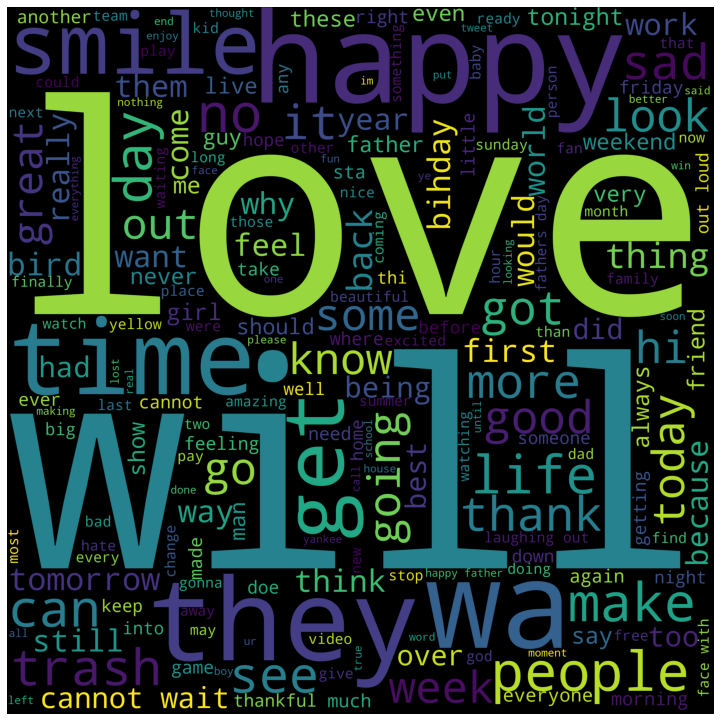

In [122]:
showWordCloud(train[train["class"] == 0].tweet)

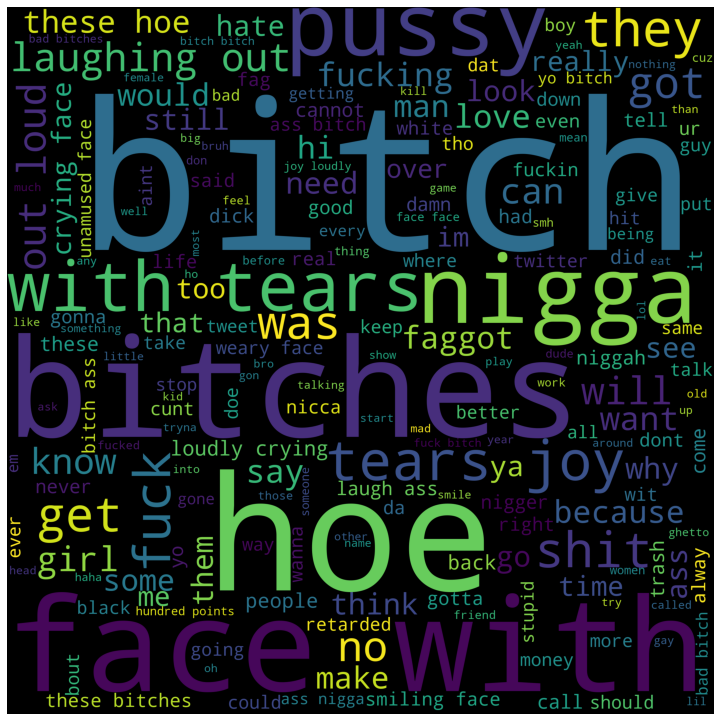

In [123]:
showWordCloud(train[train["class"] == 1].tweet)

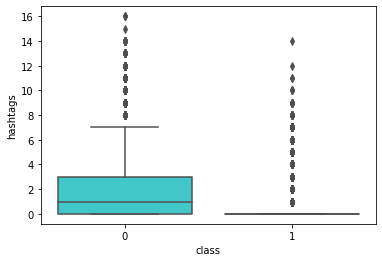

In [124]:
sns.boxplot(x='class',y='hashtags',data=train,palette='rainbow')

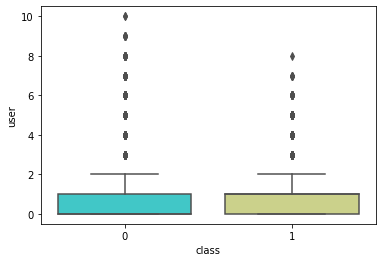

In [125]:
sns.boxplot(x='class',y='user',data=train,palette='rainbow')

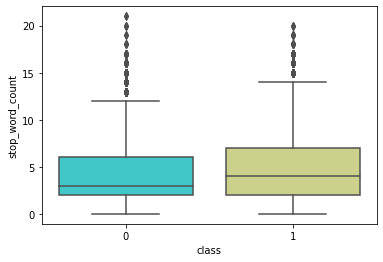

In [126]:
sns.boxplot(x='class',y='stop_word_count',data=train,palette='rainbow')

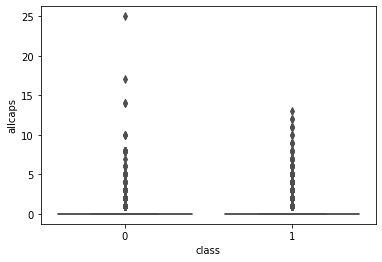

In [127]:
sns.boxplot(x='class',y='allcaps',data=train,palette='rainbow')

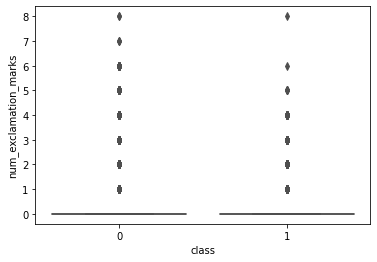

In [128]:
sns.boxplot(x='class',y='num_exclamation_marks',data=train,palette='rainbow')

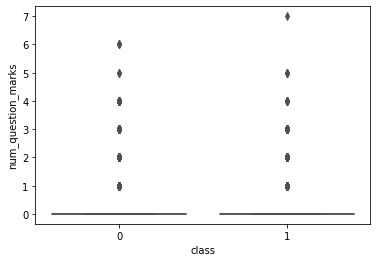

In [129]:
sns.boxplot(x='class',y='num_question_marks',data=train,palette='rainbow')


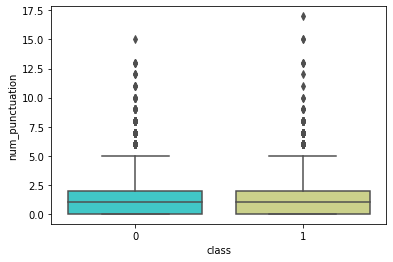

In [130]:
sns.boxplot(x='class',y='num_punctuation',data=train,palette='rainbow')

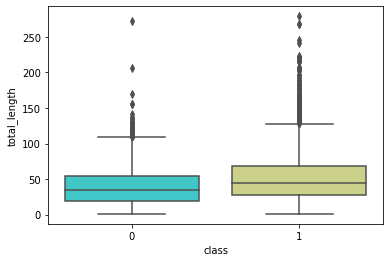

In [131]:
sns.boxplot(x='class',y='total_length',data=train,palette='rainbow')

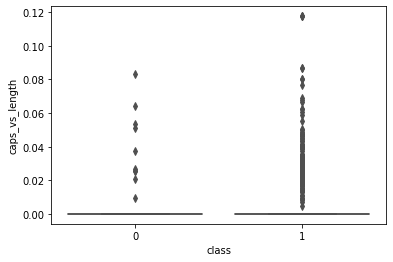

In [132]:
sns.boxplot(x='class',y='caps_vs_length',data=train,palette='rainbow')

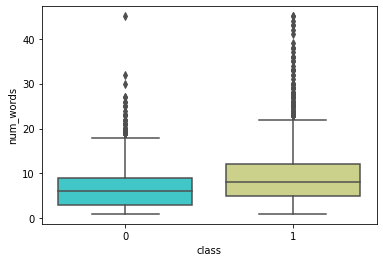

In [133]:

sns.boxplot(x='class',y='num_words',data=train,palette='rainbow')

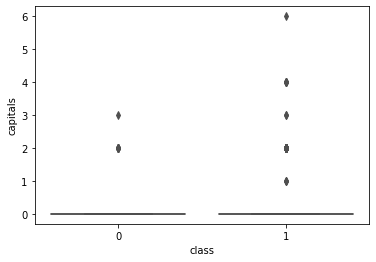

In [136]:
sns.boxplot(x='class',y='capitals',data=train,palette='rainbow')

In [137]:
len(train[train.num_words>2].tweet)

36954

In [138]:
len(train[train.num_words==1])

1675

In [141]:
train.total_length.max()

279

In [142]:
train[train.total_length==2].tweet

1498     pa
5108     no
6157     go
7902     up
10027    go
10242    it
11395    pm
11651    of
12836    ok
13002    np
15219    st
15430    go
16350    no
16566    ok
22301    oh
27392    ok
27695    ad
28355    go
30363    xx
31946    in
32251    me
34267    go
34530    pa
34574    xx
35763    to
36789    ok
37021    me
37283    mm
38045    xo
40122    go
40866    go
41316    do
Name: tweet, dtype: object

In [190]:
vec = TfidfVectorizer(ngram_range=(3,3),max_features=10000,stop_words=["has","face","he","by","one","they"])
train_tfidf0 = vec.fit_transform(train[train["class"]==1].tweet)

In [152]:
%run ../src/processing/glove_utils.py

In [191]:
word,frequency = get_top_n_words(100,vec,train_tfidf0)


In [149]:
def horizontal_bar_chart(w,f,color):
    trace = go.Bar(
        y= w[::-1],
        x= f[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [189]:
trace0 = horizontal_bar_chart(word,frequency, 'green')

In [182]:
trace1 = horizontal_bar_chart(word,frequency, 'blue')

In [155]:
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

# bigram

In [173]:
#combination 1,2
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

In [162]:
#only 2
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')


# trigrams

In [186]:
#combination 1,2,3
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')


In [192]:
#only 3
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of non-hate", 
                                          "Frequent words of hate"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')
